##### Author: Pablo Iañez Picazo
##### Biomedical Data Science lab

In [1]:
# Load all the necessary libraries
import os
import glob
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from aicsimageio import AICSImage
from skimage.restoration import estimate_sigma

from methods import hsc_spatial_stats as hsc

In [ ]:
cond_dirs = os.listdir("../data/raw_data")
czi_metadata = []

# Extract relevant technical metadata from all .czi files
for cond in cond_dirs:
    # Lists .czi files within containing folder with a given prefix
    czi_ims = glob.glob(f"../data/raw_data/{cond}/**/*.czi", recursive=True)

    for im_path in czi_ims:
        aics_image = AICSImage(im_path)

        img, _ = hsc.load_czi_image(im_path, channel_name="Ch1-T3")

        # Check if image loading was successful
        if not isinstance(img, np.ndarray):
            continue

        df = {
            "Z_res": aics_image.physical_pixel_sizes.Z,
            "X_res": aics_image.physical_pixel_sizes.X,
            "Y_res": aics_image.physical_pixel_sizes.Y,
            "num_Zs": aics_image.dims.Z,
            "num_Xs": aics_image.dims.X,
            "num_Ys": aics_image.dims.Y,
            "num_channels": aics_image.dims.C,
            "path": im_path,
            "condition": cond,
            "sigma_noise": estimate_sigma(img),
            "pixel_sum": img.sum(),
            "pixel_mean": img.mean(),
            "pixel_max": img.max(),
            "pixel_min": img.min(),
        }
        czi_metadata.append(df)

# Convert list of dictionaries to a pandas DataFrame
czi_metadata = pd.DataFrame(czi_metadata)

In [7]:
# Save metadata to a .csv file
czi_metadata.to_csv("results/czi_metadata.csv")

In [8]:
czi_metadata = pd.read_csv("results/czi_metadata.csv")

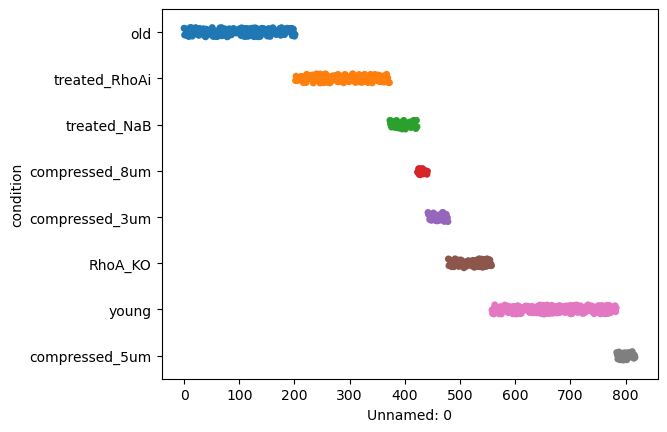

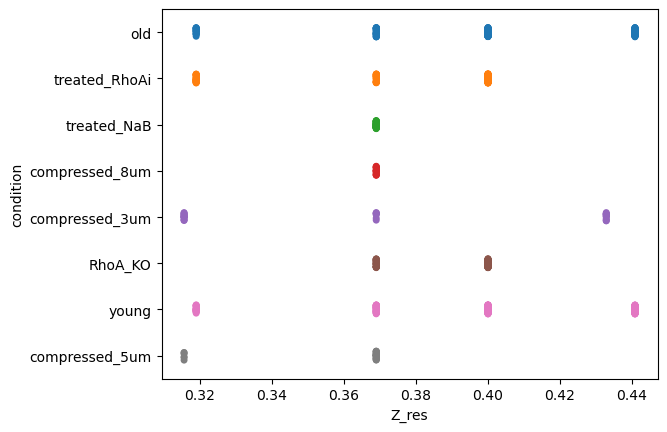

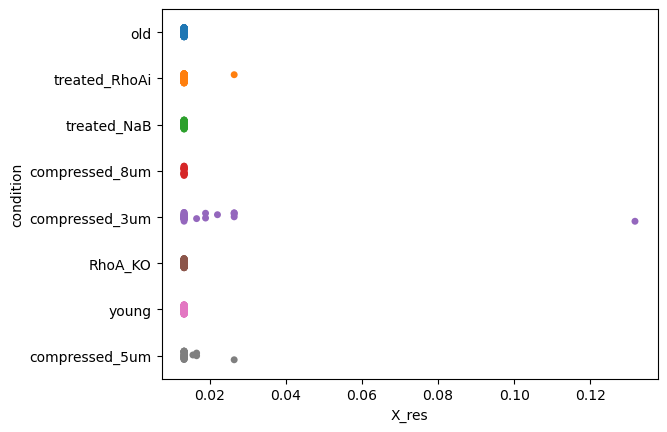

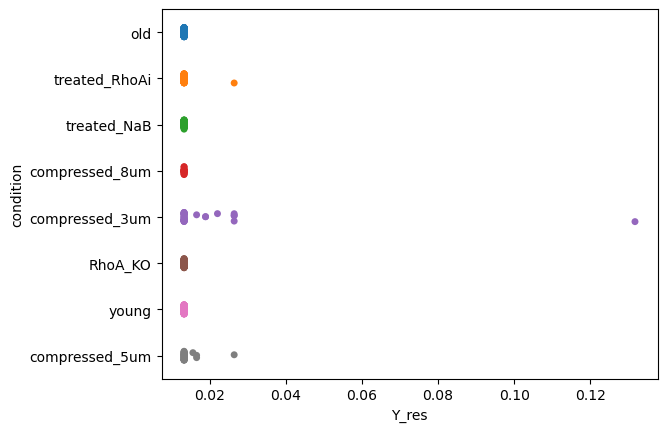

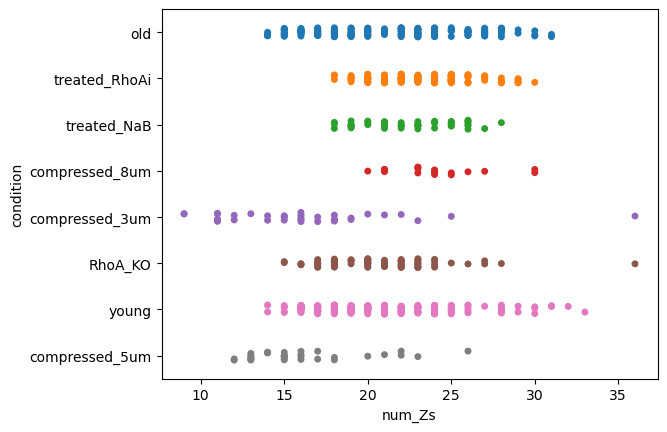

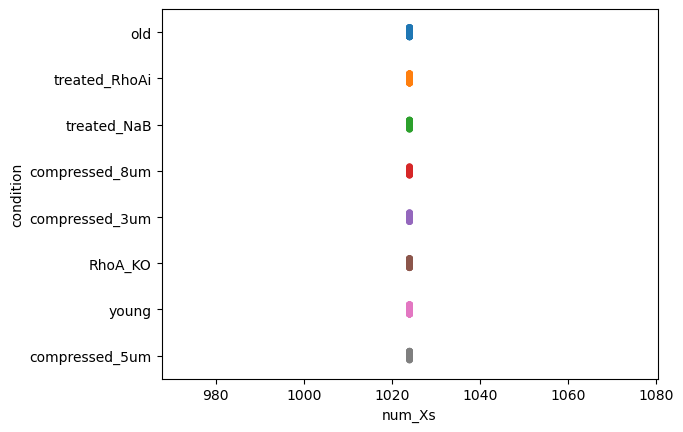

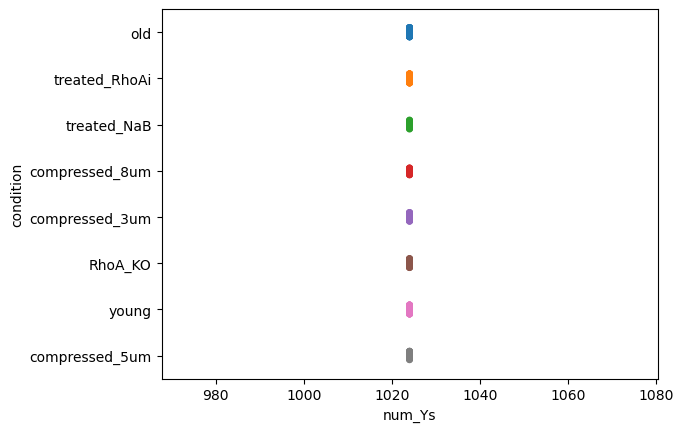

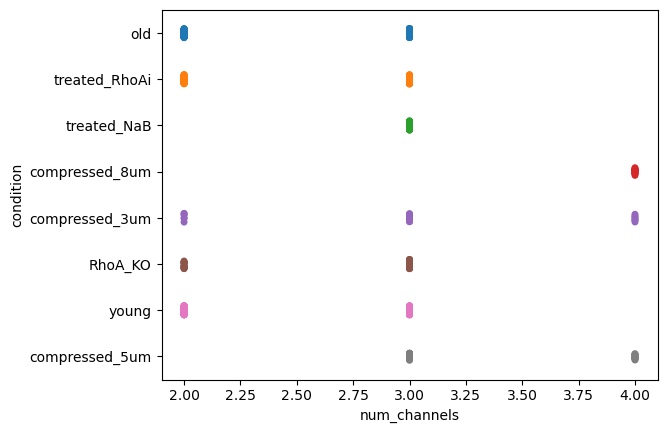

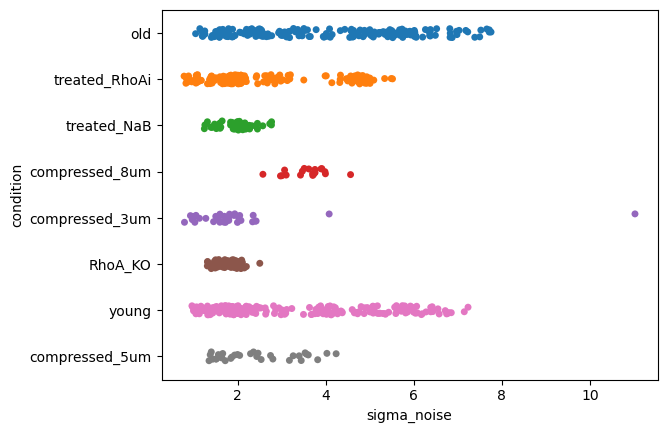

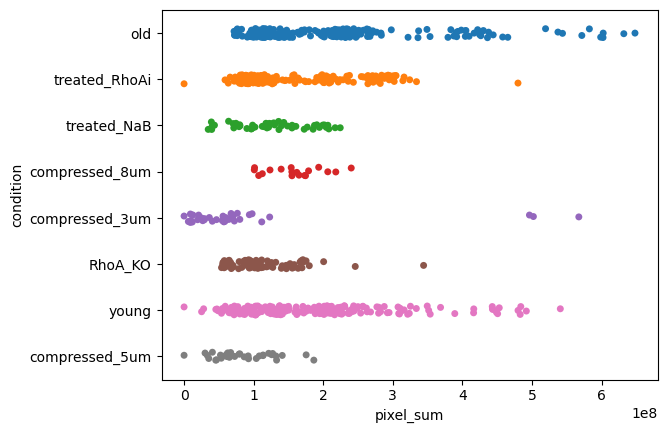

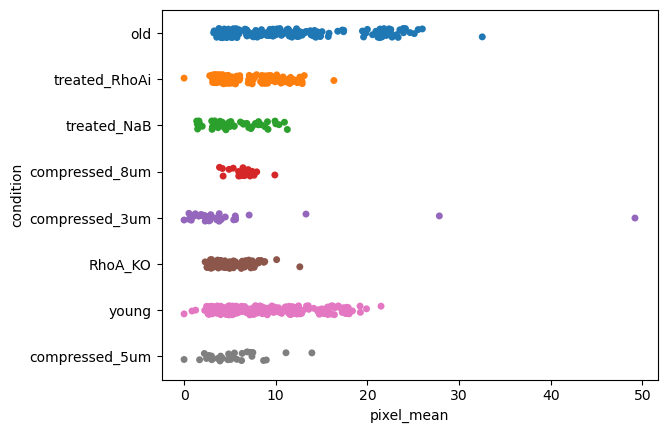

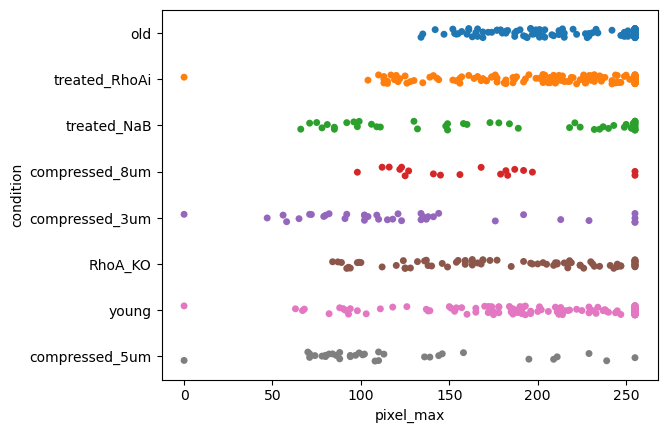

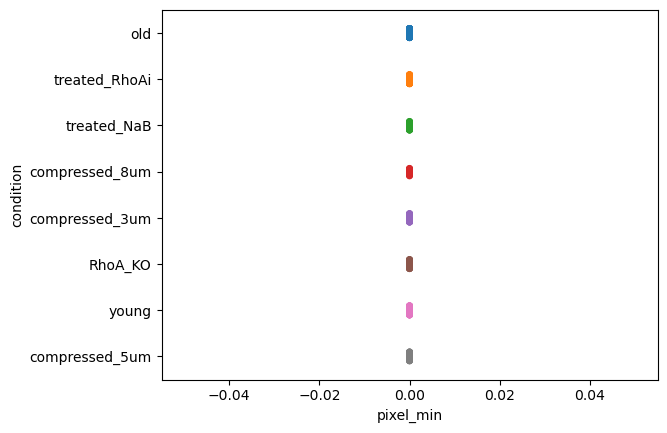

In [9]:
# Plotting the distribution of metadata variables
for c in czi_metadata.columns:
    if c in ["condition", "path"]:
        continue
    sns.stripplot(data=czi_metadata, x=c, y="condition", dodge=True, zorder=1)
    plt.show()

In [10]:
# Identify outliers in the metadata
outliers = czi_metadata.query(
    "X_res > 0.014 or sigma_noise > 8 or pixel_sum > 4e8"
)
outliers

,Unnamed: 0,Z_res,X_res,Y_res,num_Zs,num_Xs,num_Ys,num_channels,path,condition,sigma_noise,pixel_sum,pixel_mean,pixel_max,pixel_min
12,12,0.400000,0.013179,0.013179,19,1024,1024,3,hsc_raw_data/old/wetransfer-277611/20201218exp...,old,5.929145,648119602,32.531317,255,0
13,13,0.400000,0.013179,0.013179,23,1024,1024,3,hsc_raw_data/old/wetransfer-277611/20201218exp...,old,5.307605,519570082,21.543506,255,0
14,14,0.400000,0.013179,0.013179,24,1024,1024,3,hsc_raw_data/old/wetransfer-277611/20201218exp...,old,5.680600,537381672,21.353629,255,0
15,15,0.400000,0.013179,0.013179,27,1024,1024,3,hsc_raw_data/old/wetransfer-277611/20201218exp...,old,5.222804,598828398,21.151380,255,0
16,16,0.400000,0.013179,0.013179,24,1024,1024,3,hsc_raw_data/old/wetransfer-277611/20201218exp...,old,5.755239,632072915,25.116321,255,0
17,17,0.400000,0.013179,0.013179,23,1024,1024,3,hsc_raw_data/old/wetransfer-277611/20201218exp...,old,5.581670,582564298,24.155505,255,0
18,18,0.400000,0.013179,0.013179,24,1024,1024,3,hsc_raw_data/old/wetransfer-277611/20201218exp...,old,5.409417,602436687,23.938683,255,0
19,19,0.400000,0.013179,0.013179,23,1024,1024,3,hsc_raw_data/old/wetransfer-277611/20201218exp...,old,5.346039,543939880,22.553978,255,0
20,20,0.400000,0.013179,0.013179,25,1024,1024,3,hsc_raw_data/old/wetransfer-277611/20201218exp...,old,5.395619,571718817,21.809342,255,0
21,21,0.400000,0.013179,0.013179,24,1024,1024,3,hsc_raw_data/old/wetransfer-277611/20201218exp...,old,5.478867,602184927,23.928679,255,0


In [11]:
print(len(outliers))
# Save outliers to a .csv file
outliers["path"].to_csv("results/czi_image_outliers.csv")

55


In [18]:
# Filter out outliers
czi_metadata_filt = czi_metadata.query(
    "X_res < 0.014 and sigma_noise < 8 and pixel_sum < 4e8"
)

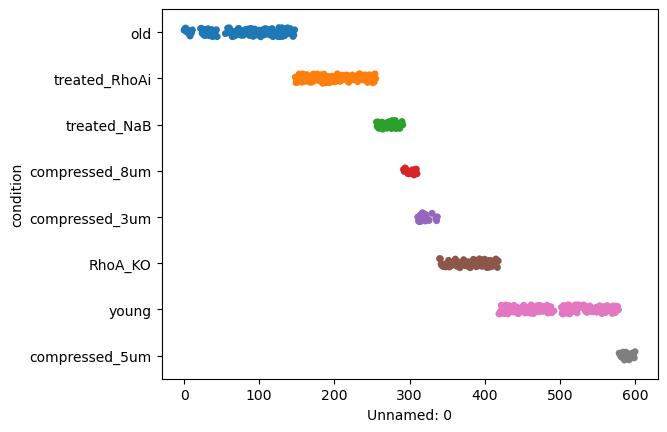

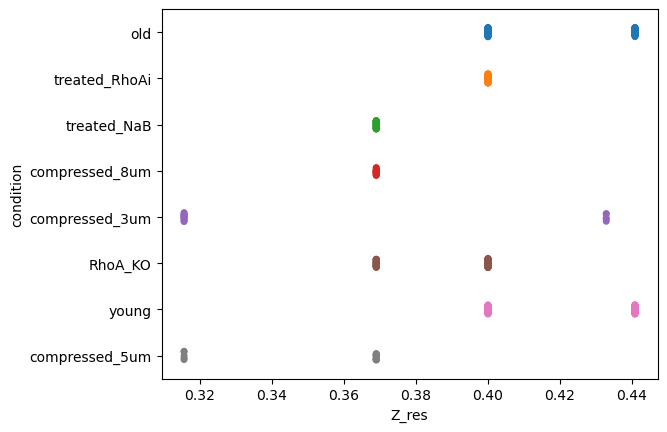

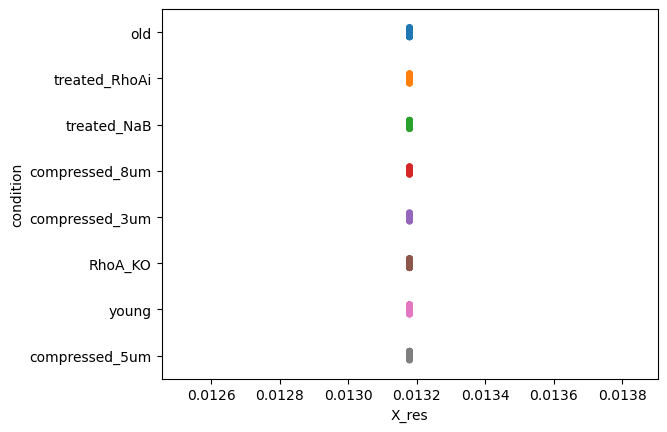

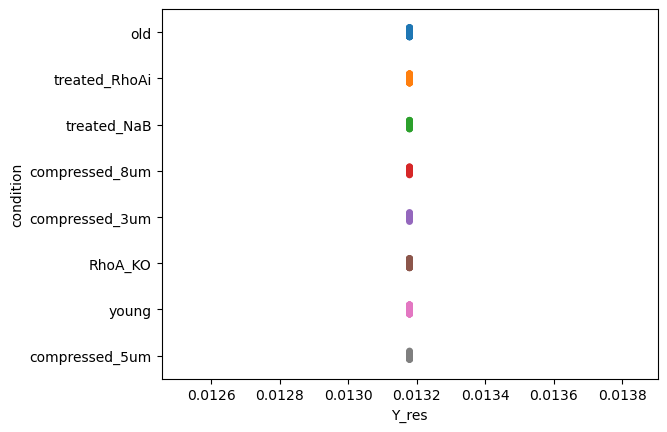

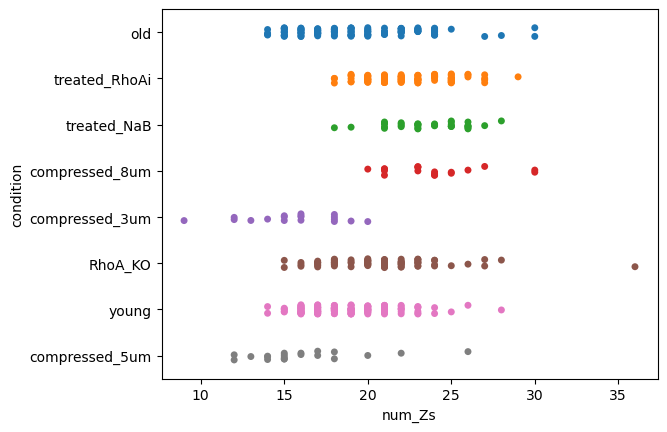

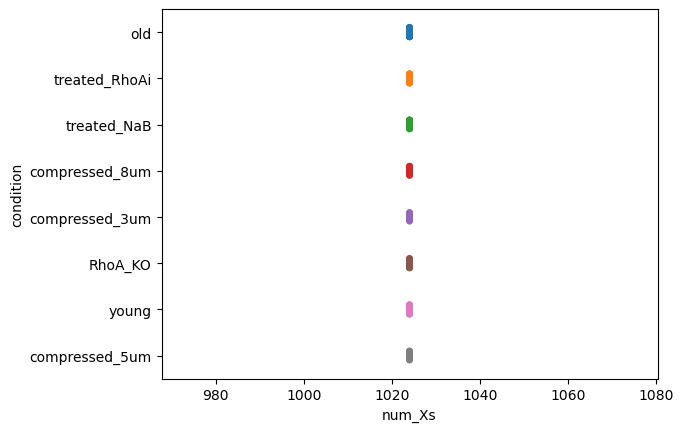

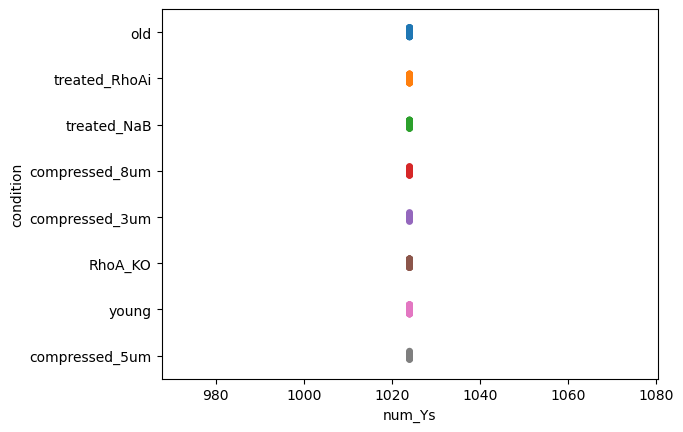

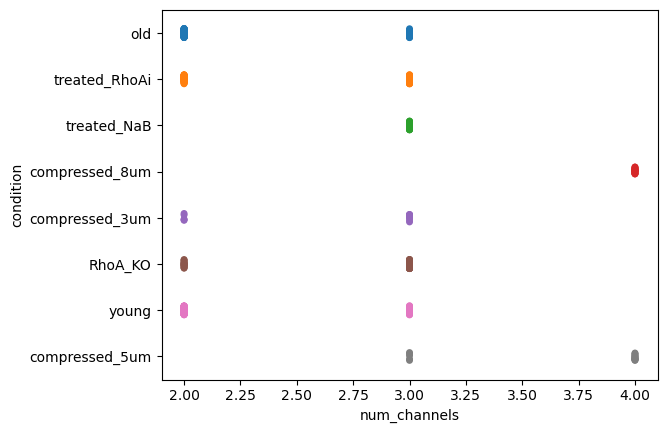

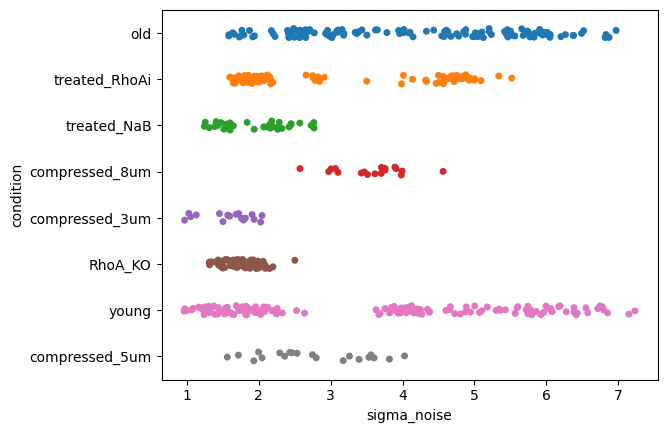

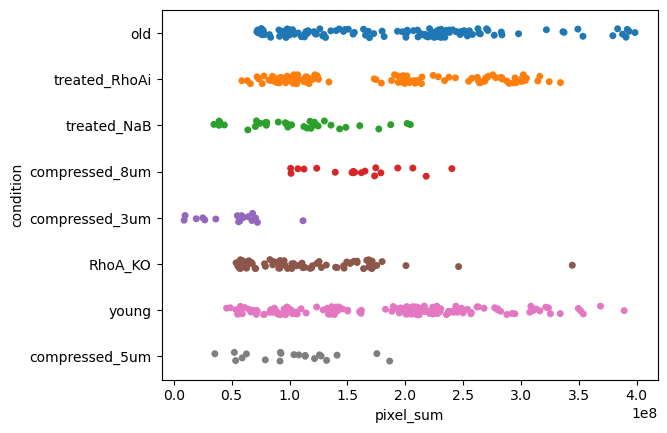

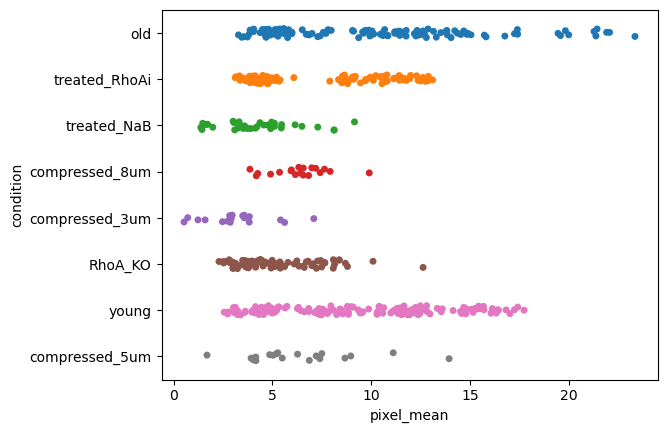

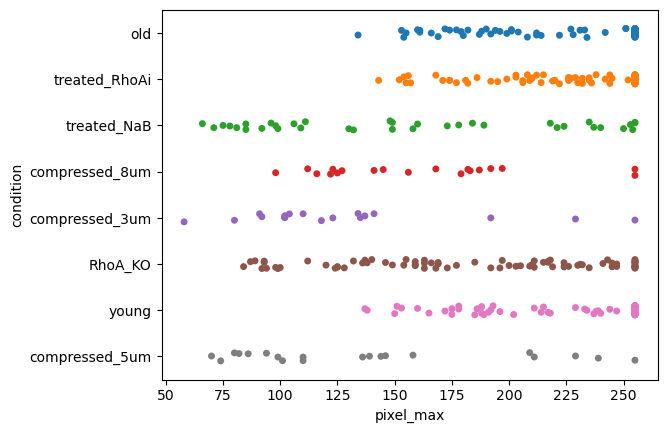

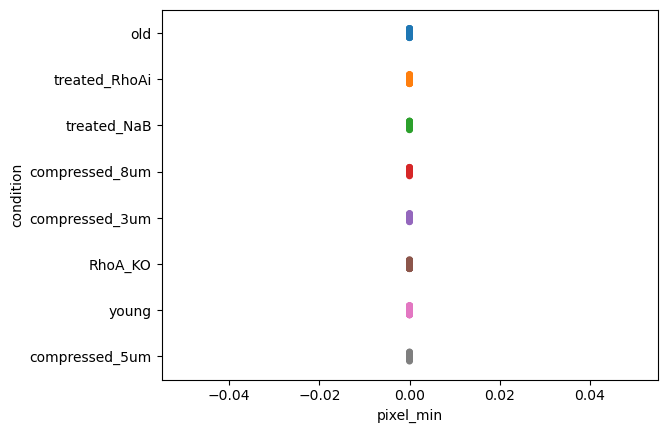

In [19]:
# Plotting the distribution of metadata variables after filtering
for c in czi_metadata.columns:
    if c in ["condition", "path"]:
        continue
    sns.stripplot(
        data=czi_metadata_filt, x=c, y="condition", dodge=True, zorder=1
    )
    plt.show()